In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Stars.csv")

In [3]:
#L = Luminosity | R = Radius | A_M = Absolute Magnitude
#Red Dwarf - 0 | Brown Dwarf - 1 | White Dwarf - 2 | Main Sequence - 3 | Super Giants - 4 | Hyper Giants - 5
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
df.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [5]:
df["Color"] = df["Color"].astype(str)
df["Spectral_Class"] = df["Spectral_Class"].astype(str)
color_list = list(df["Color"])
#print(color_list)

In [6]:
from collections import Counter
count_color = Counter(color_list)
print(count_color)

Counter({'Red': 112, 'Blue': 56, 'Blue-white': 26, 'Blue White': 10, 'yellow-white': 8, 'White': 7, 'Blue white': 4, 'Yellowish White': 3, 'white': 3, 'Whitish': 2, 'Orange': 2, 'yellowish': 2, 'Pale yellow orange': 1, 'White-Yellow': 1, 'Yellowish': 1, 'Orange-Red': 1, 'Blue-White': 1})


In [7]:
#Red | Blue | Blue-white | Blue White | yellow-white | White | Blue white
df["Color"] = df["Color"].replace("Whitish", "White")
df["Color"] = df["Color"].replace("white", "White")

df["Color"] = df["Color"].replace("Blue-white", "Blue white")
df["Color"] = df["Color"].replace("Blue White", "Blue white")
df["Color"] = df["Color"].replace("Blue-White", "Blue white")

df["Color"] = df["Color"].replace("yellow-white", "Yellowish White")
df["Color"] = df["Color"].replace("White-Yellow", "Yellowish White")

df["Color"] = df["Color"].replace("Yellowish", "yellowish")

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Color"] = encoder.fit_transform(df["Color"])
print(encoder.classes_)
df["Spectral_Class"] = encoder.fit_transform(df["Spectral_Class"])
print(encoder.classes_)

y = df["Type"]
x = df.drop(["Type"], axis=1)

#'Red': 0, 'Blue': 1, 'Blue-white': 2, 'Blue White': 2, 'Blue white': 2, 'yellow-white': 3, 'Yellowish White': 3, 'White': 4, 'white': 4
#index = 0
"""for color in x["Color"]:
    if color == 'Red':
        x.loc[index, "Color"] = 0
    elif color == 'Blue':
        x.loc[index, "Color"] = 1
    elif color == 'Blue-white' or color == 'Blue White' or color == 'Blue white' or color == 'Blue-White':
        x.loc[index, "Color"] = 2
    elif color == 'yellow-white' or color == 'White-Yellow' or color == 'Yellowish White':
        x.loc[index, "Color"] = 3
    elif color == 'White' or color == 'Whitish' or color == 'white':
        x.loc[index, "Color"] = 4
    elif color == 'Orange' or color == 'Orange-Red':
        x.loc[index, "Color"] = 5
    else:
        x.loc[index, "Color"] = 6
    index += 1"""
#x["Color"] = x["Color"].astype(int64)
print(x.shape)

['Blue' 'Blue white' 'Orange' 'Orange-Red' 'Pale yellow orange' 'Red'
 'White' 'Yellowish White' 'yellowish']
['A' 'B' 'F' 'G' 'K' 'M' 'O']
(240, 6)


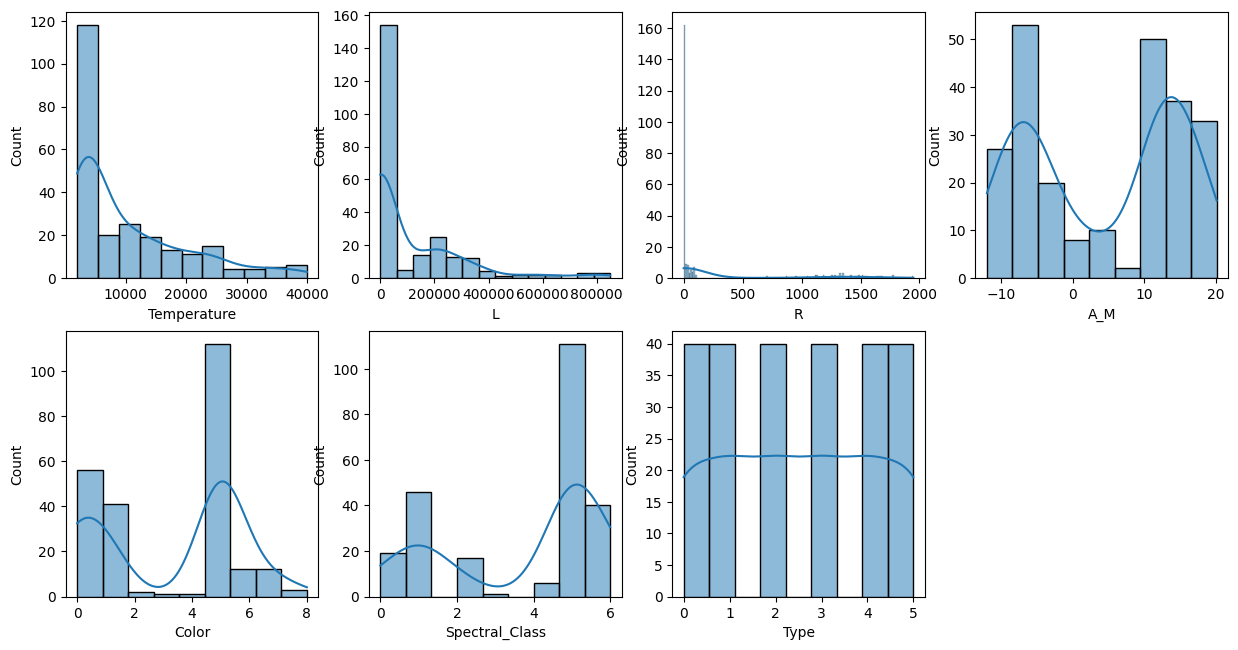

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

for i in range(1, len(df.columns) + 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[df.columns[i - 1]], kde=True)

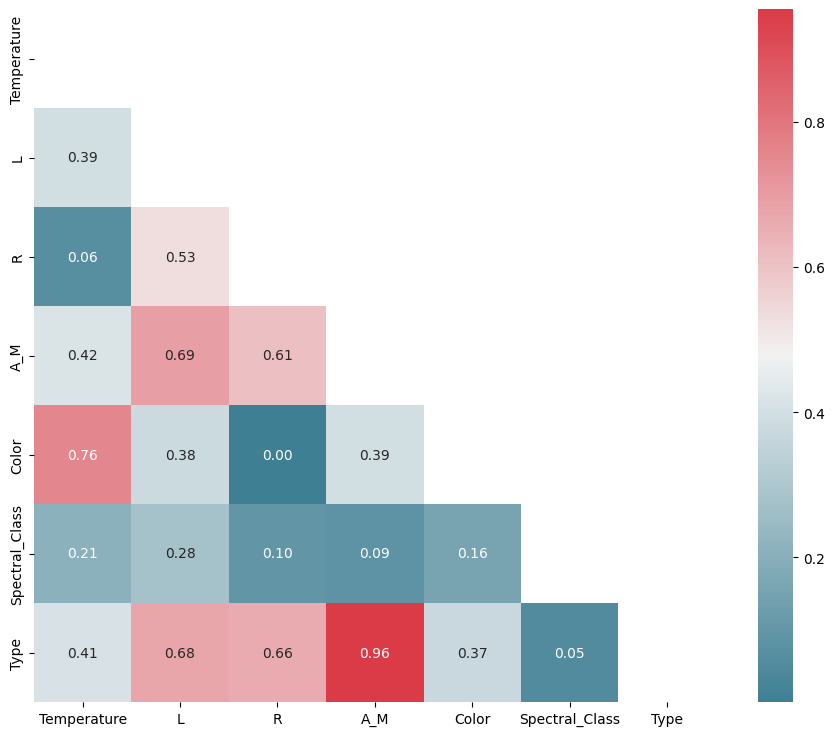

In [9]:
import numpy as np

def print_corr_heatmap(df):
    corr_df = df.corr()
    
    corr_df.Type.abs().sort_values(ascending=False).index[0:]
    
    plt.figure(figsize=(11, 9))
    drop_self = np.zeros_like(corr_df)
    drop_self[np.triu_indices_from(drop_self)] = True
    
    sns.heatmap(corr_df.abs(), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=drop_self)
    
print_corr_heatmap(df)

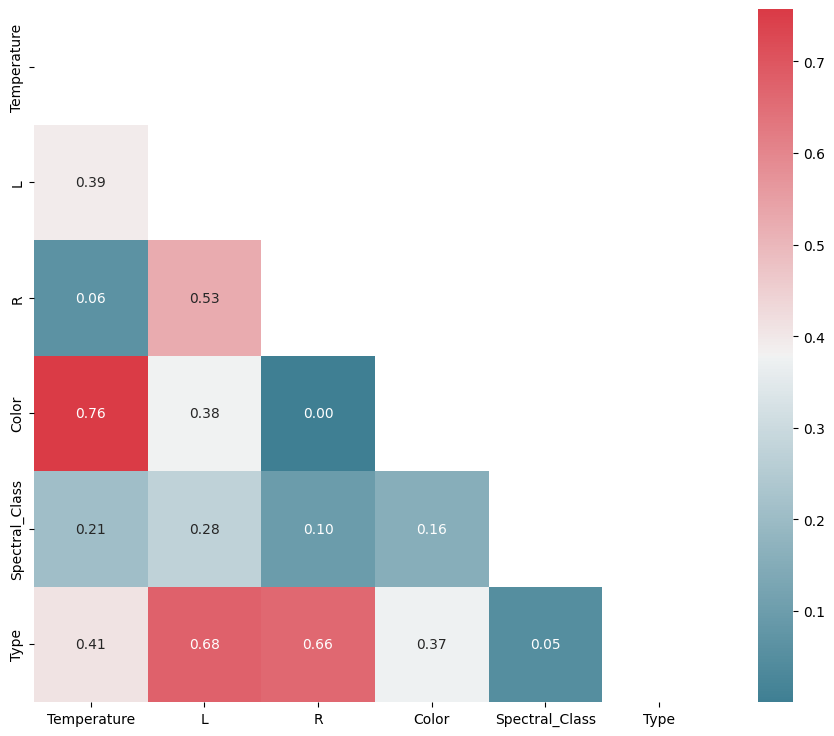

In [10]:
drop_features = ["A_M"]

new_df = df.drop(drop_features, axis=1)

print_corr_heatmap(new_df)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=83)
print("Train size:", len(x_train))
print("Test size:", len(x_test))
print(len(x_train) + len(x_test))
x.shape

Train size: 192
Test size: 48
240


(240, 6)

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_clr = RandomForestClassifier(max_depth=4, n_estimators=100, max_leaf_nodes=4, random_state=0)
rf_clr.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, max_leaf_nodes=4, random_state=0)

In [13]:
#RandomForestClassifier unoptimized

In [14]:
from sklearn.metrics import accuracy_score

y_pred = rf_clr.predict(x_test)

print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 1.0


In [15]:
from sklearn.tree import DecisionTreeClassifier

dt_clr = DecisionTreeClassifier(max_depth=3, random_state=3)
dt_clr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=3)

In [16]:
#DecisionTreeClassifier unoptimized

In [17]:
y_pred = dt_clr.predict(x_test)

print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.5208333333333334


In [18]:
new_y = new_df["Type"]
new_x = new_df.drop(["Type"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.2, random_state=83)
rf_clr.fit(x_train, y_train)

print("Train size:", len(x_train))
print("Test size:", len(x_test))

Train size: 192
Test size: 48


In [19]:
#RandomForestClassifier optimized

In [20]:
y_pred = rf_clr.predict(x_test)

print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.9791666666666666


In [21]:
#DecisionTreeClassifier optimized

In [22]:
dt_clr.fit(x_train, y_train)

y_pred = dt_clr.predict(x_test)

print("Accuracy:", accuracy_score(y_pred, y_test))

Accuracy: 0.7291666666666666


In [23]:
print(df[0:5])

   Temperature         L       R    A_M  Color  Spectral_Class  Type
0         3068  0.002400  0.1700  16.12      5               5     0
1         3042  0.000500  0.1542  16.60      5               5     0
2         2600  0.000300  0.1020  18.70      5               5     0
3         2800  0.000200  0.1600  16.65      5               5     0
4         1939  0.000138  0.1030  20.06      5               5     0


In [24]:
print(df[10:15])

    Temperature       L       R     A_M  Color  Spectral_Class  Type
10         3600  0.0029  0.5100  10.690      5               5     1
11         3129  0.0122  0.3761  11.790      5               5     1
12         3134  0.0004  0.1960  13.210      5               5     1
13         3628  0.0055  0.3930  10.480      5               5     1
14         2650  0.0006  0.1400  11.782      5               5     1


In [25]:
print(df[20:25])

    Temperature        L        R    A_M  Color  Spectral_Class  Type
20        25000  0.05600  0.00840  10.58      1               1     2
21         7740  0.00049  0.01234  14.02      6               0     2
22         7220  0.00017  0.01100  14.23      6               2     2
23         8500  0.00050  0.01000  14.50      6               0     2
24        16500  0.01300  0.01400  11.89      1               1     2


In [26]:
print(df[30:35])

    Temperature          L      R   A_M  Color  Spectral_Class  Type
30        39000  204000.00  10.60 -4.70      0               6     3
31        30000   28840.00   6.30 -4.20      1               1     3
32        15276    1136.00   7.20 -1.97      1               1     3
33         9700      74.00   2.89  0.16      6               1     3
34         5800       0.81   0.90  5.05      7               2     3


In [27]:
print(df[40:45])

    Temperature         L     R   A_M  Color  Spectral_Class  Type
40         3826  200000.0  19.0 -6.93      5               5     4
41         3365  340000.0  23.0 -6.20      5               5     4
42         3270  150000.0  88.0 -6.02      5               5     4
43         3200  195000.0  17.0 -7.22      5               5     4
44         3008  280000.0  25.0 -6.00      5               5     4


In [28]:
print(df[50:55])

    Temperature         L       R   A_M  Color  Spectral_Class  Type
50         3490  270000.0  1520.0 -9.40      5               5     5
51         3750  283000.0  1260.0 -7.63      5               5     5
52         3834  272000.0  1183.0 -9.20      5               5     5
53         3749  550000.0  1648.0 -8.05      2               5     5
54         3650  310000.0  1324.0 -7.79      5               5     5
